# The Effects of Experience Level, Hours Spent Gaming, and Age to Predict Subscription in a Game-related Newsletter

*DSCI100*
<br/>

*Dr. Premarathna* 
<br/>

**Project Contributors:**  
Denzel Hu | 39248687  
Yan | 10583730  
David | 96943022\
Natalie Kei Wing Lo | 39085261  


## Introduction

As part of ongoing research at UBC involving data collection on how people play video games, a MineCraft server has been set up to record players' actions as they play the game. Basic demographical information was obtained from players via a survey given to them when they signed up to participate in the study, creating a dataset, "players.csv". Our group has been tasked to use this dataset to make some inferences on potential player behavior. To begin, our group loaded and looked at "players.csv" to make some insights:

In [513]:
library(tidyverse)
library(ggplot2)
library(repr)
library(tidymodels)
library(cowplot)
library(readxl)
install.packages("kknn")
options(repr.matrix.max.rows = 6)
install.packages("themis")
library(themis)


players_data <- read.csv("https://raw.githubusercontent.com/daviddning/project_planning/refs/heads/main/players.csv")

head(players_data) # to see a preview
nrow(players_data) # number of observations

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

### Initial Insights:

**General Information/Statistics**  
Number of Observations: 196  
Number of Variables: 7  
Method of Data Collection: Players filled out a survey covering basic information (ie. age, gender, and name) when signing up to play the game. Hours played was recorded by aggregating sessional times per player.  

<br/>

**Description of Variables**
  
| Variable | Description of Variable | Variable Type |
|:--------|:--------|:--------|
| experience | Level of video gaming experience of the player | chr
| subscribe  | Whether the player is subscribed to a game-related newsletter | lgl
| hashedEmail | An encrypted version of the player's email address | chr
| players_hours | Hours played by the player | dbl
| name | First name of the player| chr
| gender | Gender of the player| chr
| age | Age of the player| dbl

-> chr (character): Represents strings of text or characters. *Qualitative*  
-> dbl (double): Represents double-precision floating-point numbers, which are real numbers that can have decimal places. *Quantitative*   
-> lgl (logical): Represents logical values, which can be either TRUE or FALSE. *Qualitative* 


In [514]:
summary(players_data)

mean(players_data$Age, na.rm = TRUE) # average age

mean(players_data$played_hours, na.rm = TRUE) # average hours played

sum(players_data$gender == "Male" )# number of male individuals
sum(players_data$gender == "Female") # number of female individuals
sum(players_data$gender == "Non-binary") # number of non-binary individuals

sum(players_data$subscribe == "TRUE") # number of people subscribed
sum(players_data$subscribe == "FALSE") # number of people not subscribed

sum(players_data$experience == "Pro") # number of pro players
sum(players_data$experience == "Veteran") # number of veteran players
sum(players_data$experience == "Regular") # number of regular players
sum(players_data$experience == "Amateur") # number of amateur players
sum(players_data$experience == "Beginner") # number of beginner players

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

[1] 20.52062

[1] 5.845918

[1] 124

[1] 37

[1] 15

[1] 144

[1] 52

[1] 14

[1] 48

[1] 36

[1] 63

[1] 35

Upon further investigation:
#### Data Summary:

| Variable | Mean/Average | Median |
|:--------|:--------|:--------|
| Age | 20.5 yrs | 19 yrs
| Playtime | 5.8 hrs | 0.1 hrs

<br/>

| Variable | Value | Number of Values |
|:--------|:--------|:--------|
| Gender | Male | 124
| | Female | 37
| | Non-binary | 15
| | |
| Subscription Status | Subscribed | 144
| | Not Subscribed| 52
| | |
| Experience Level | Pro | 14
| | Veteran | 48
| | Regular | 36
| | Amateur | 63
| | Beginner | 35


#### Issues in the Data:
- Missing values in "Age"
- 20 individuals did not disclose their gender
- Extreme outliers in "played_hours" (mean = 5.8, median = 0.1)

#### Potential external issues:
- Sampling bias may exclude certain demographics
- Player behavior can change over time
- "Played_hours" may include AFK time
- "Experience" classifications may be misleading


### Research Questions:
Having viewed and analyzed the dataset briefly, our group came to a consensus to investigate the following questions:

**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:** Can hours spent gaming and age predict whether a player subscribes to the game-related newsletter?

### Tidying/Wrangling the Data:
To investigate these relationships, there is a need to understand, tidy and wrangle "players.csv" in the following ways:

#### Understanding Newsletter Subscriptions in players.csv
- Age analysis: Determines if younger or older players subscribe more.
- Experience & gender: Helps target the right audience.

#### Data Wrangling for KNN & Linear Regression
- Remove "hashedEmail" and "name" (not predictive).
- Encode categorical variables.
- Impute missing values or remove rows.
- Normalize numerical features.
- Detect and handle outliers.

### Wrangling

In [678]:
players <- players_data |>
    select(-hashedEmail, -name, -gender, -experience) |>
    drop_na()

# convert TRUEs to 'Yes' and FALSEs to 'No'
# to ensure that knn classification works correctly.

players <- players |>
    mutate(subscribe = factor(subscribe, levels = c(TRUE, FALSE), labels = c('Yes', 'No')))

players
     

subscribe,played_hours,Age
<fct>,<dbl>,<int>
Yes,30.3,9
Yes,3.8,17
No,0.0,17
⋮,⋮,⋮
No,0.3,22
No,0.0,17
No,2.3,17


## Methods & Results

Before performing any model fitting, we explored the explanatory variables to understand the structure of the data and gain insights into the relationships between variables. \
The key variables of interest in our analysis were experience level, played hours, and age, with the goal of predicting whether a player is subscribed to the newsletter.

We examined the distribution of played hours for players who were subscribed and not subscribed. The jitterplot and table belows illustrate that played hours differs significantly between the subscribed and non-subscribed players, with subscribed players generally playing more hours. 
\
Note that some players' data exceeded the scale in the subscribed category, with a few players having exceptionally high played hours

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


subscribe,Mean_Played_Hours,Count
<fct>,<dbl>,<int>
Yes,7.8830986,142
No,0.5019231,52


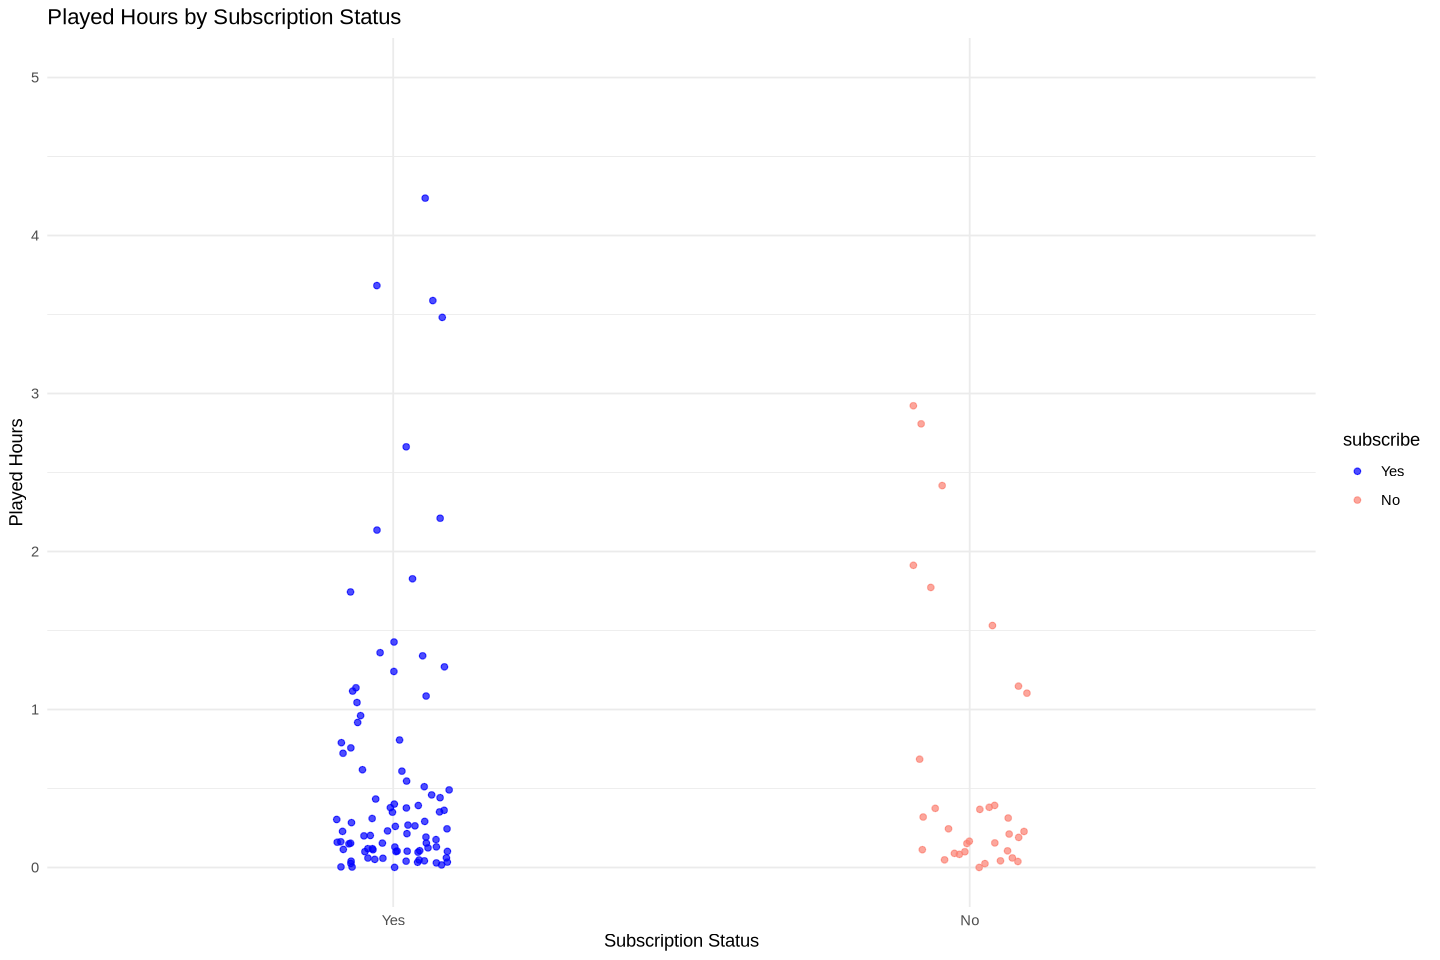

In [679]:
ggplot(players, aes(x = subscribe, y = played_hours, color = subscribe)) +
  geom_jitter(width = 0.1, height = 0.3, alpha = 0.7) +
  labs(title = "Played Hours by Subscription Status", x = "Subscription Status", y = "Played Hours") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "salmon")) +
  scale_y_continuous(limits = c(0, 5))  # Set y-axis limits from 0 to 20

# table comparison 
summary_table <- players |>
group_by(subscribe) |>
summarise(Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
            Count = n())
summary_table


In addition, we also examined the data to see the impact of age on subscriptions. By visualizing the distribution of age the subscribed group, we found that most subscribers were in the 17-25 age range. 

Age_Group,Count
<chr>,<int>
17-25,121
Other,21


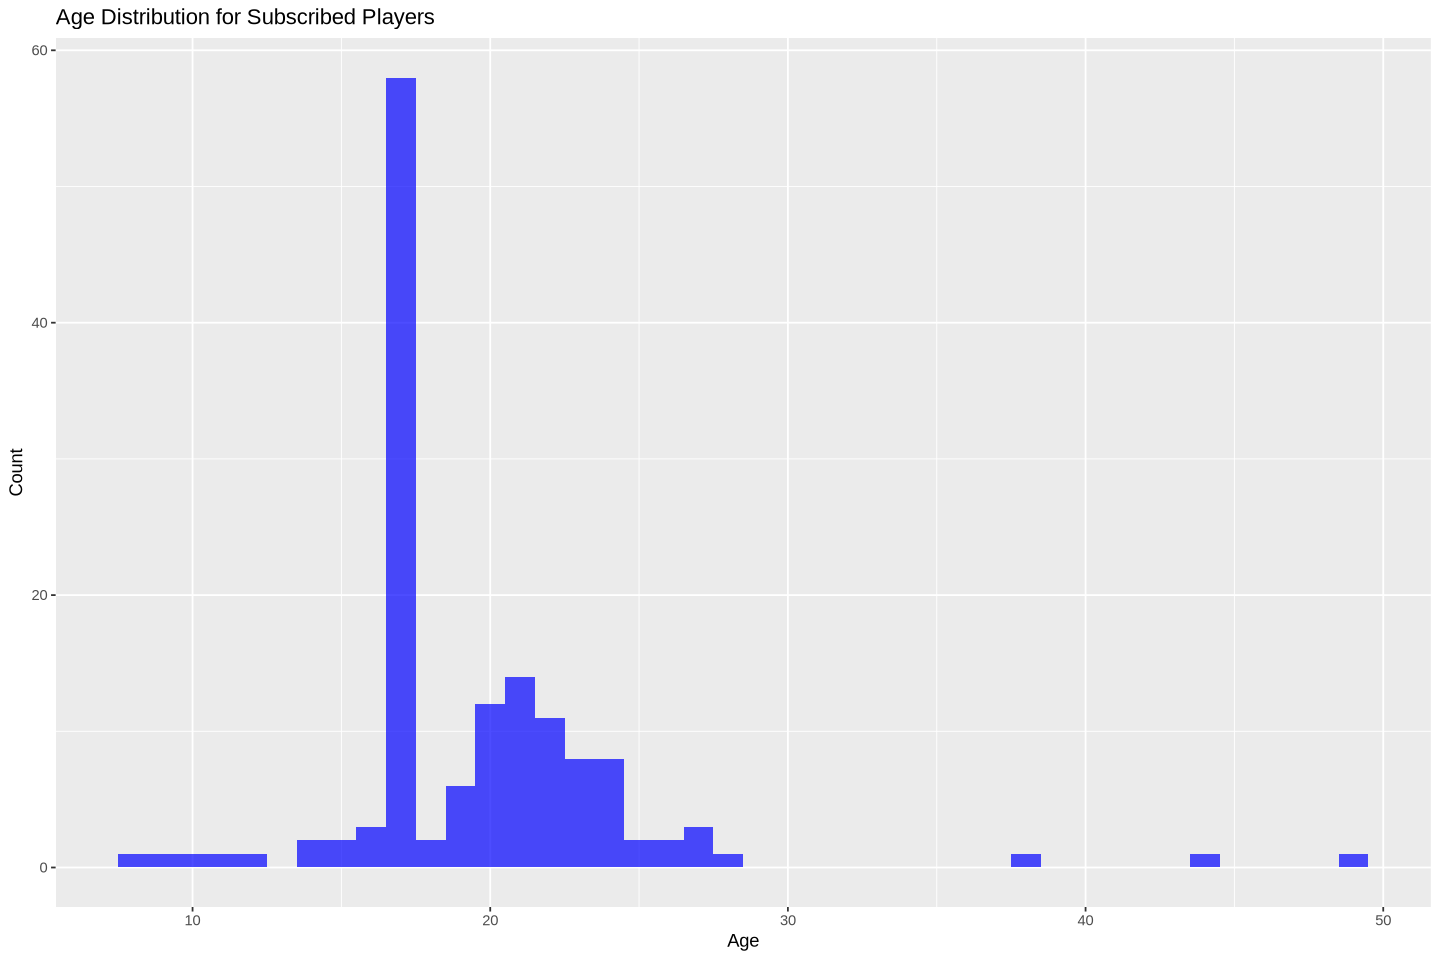

In [680]:

# Graph age distribution for subscribed users
ggplot(players |> filter(subscribe == "Yes"), aes(x = Age)) +
geom_histogram(binwidth = 1, fill = "blue", alpha = 0.7) +
labs(title = "Age Distribution for Subscribed Players",
     x = "Age", 
     y = "Count") 

# Create a table to confirm trends in graph
age_17_25 <- players %>%
  filter(Age >= 17 & Age <= 25, subscribe == "Yes")

age_other <- players %>%
  filter(!(Age >= 17 & Age <= 25), subscribe == "Yes")

age_17_25_count <- nrow(age_17_25)
age_other_count <- nrow(age_other)

age_group_table <- tibble(
Age_Group = c("17-25", "Other"),
Count = c(age_17_25_count, age_other_count))

age_group_table

From these observations, we can conclude that a significant portion of subscribed players (around 85%) falls within the 17-25 age group, indicating that younger players are more likely to subscribe to the newsletter.

To explore these relationships further, our group plans to use the K Nearest Neighbors Algorithm (K-NN) using two predictors:

1) Hours Played
2) Age

to predict *subscription to a game-related newsletter.* 

Using the tidied dataframe (players), we will first need to split the data into a training and testing set. We decided to split the data with a proportion of 0.8 meaning the training set will be 80% while the testing set will be 20% of the dataset. The reason we chose 0.8 for our proportion split is because the dataset is relatively small, and we want to perform K-cross validation to pick our K-value. As such, we will need a big enough training data to do so. 

In [681]:
# to ensure reproducible results
set.seed(100)

players_split <- initial_split(players, prop = 0.80, strata = subscribe) # splitting the data

# assigning the split data
players_training <- training(players_split)
players_testing <- testing(players_split)

We then check to see if we have a similar number of observations for each class in the training set.

In [682]:
# Check the class distribution
players_training |>
  group_by(subscribe) |>
  summarize(n = n())

subscribe,n
<fct>,<int>
Yes,113
No,41


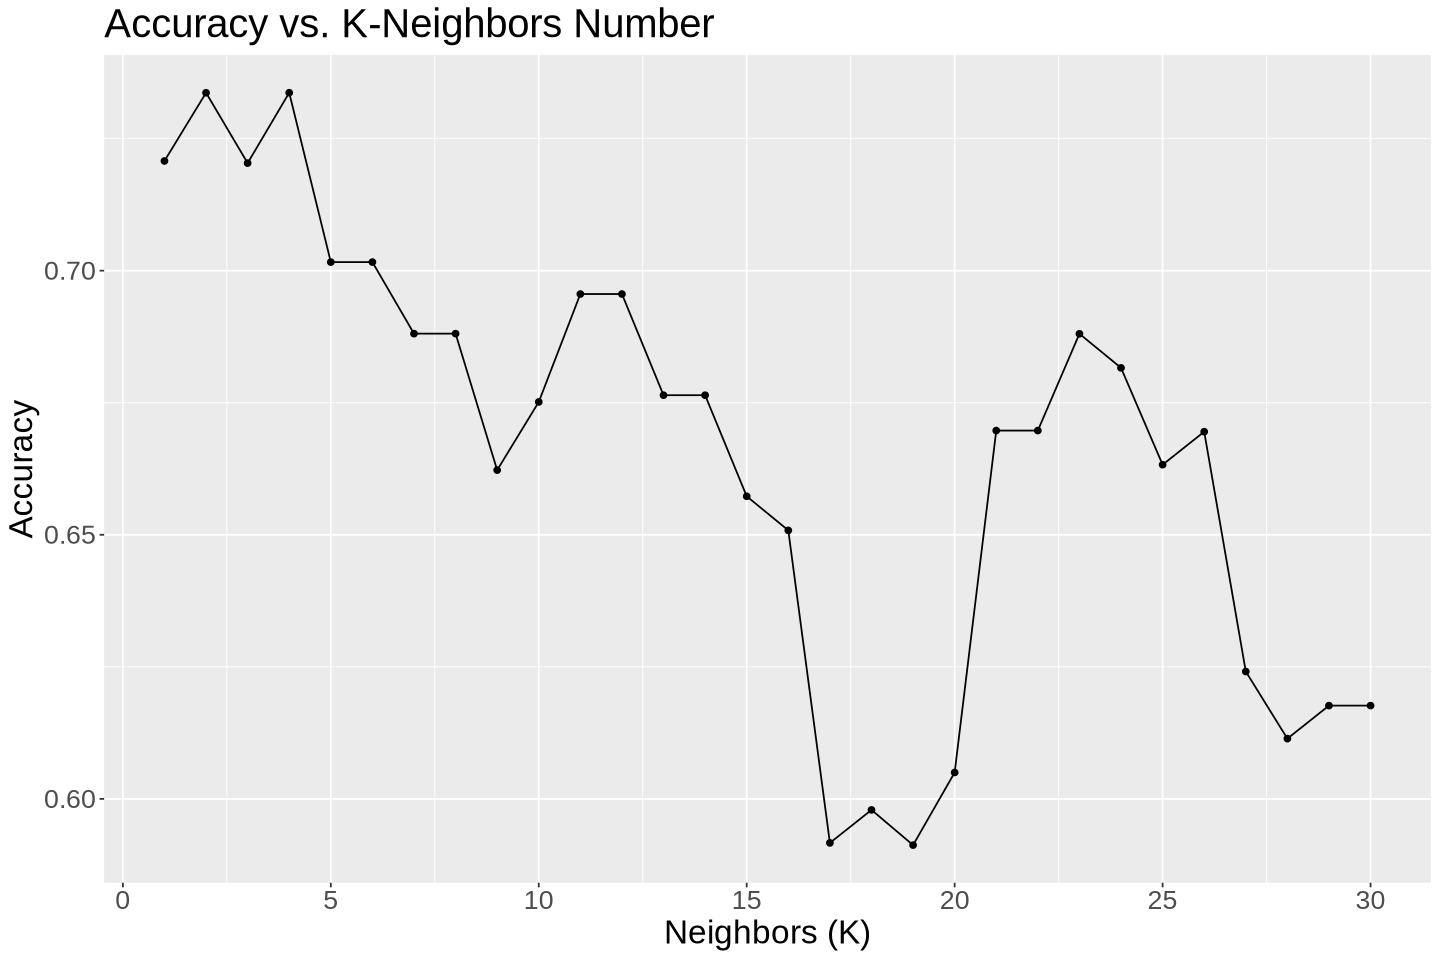

In [723]:
set.seed(100)

# the number of folds to try and the k-values we want to test
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# make the spec
players_spec <- nearest_neighbor(weight = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# make the recipe
players_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_center(Age, played_hours) |>
    step_scale(Age, played_hours) |>
    step_upsample(subscribe, over_ratio = 2) 

# fit it all together
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals)

# get the accuracy of each k-val
knn_accuracy <- players_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy") 

# create a cross validation graph to see the best k-value (highest accuracy)

options(repr.plot.width = 12, repr.plot.height = 8)

cross_val_plot <- knn_accuracy |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(title = "Accuracy vs. K-Neighbors Number",
        x = "Neighbors (K)",
        y = "Accuracy") +
    scale_x_continuous(breaks = seq(from = 0, to = 30, by = 5)) +
    theme(text = element_text(size = 20))
cross_val_plot

The graph above depicts that the accuracy peaks and plateaus at k = 2 and 4, with almost 75% accuracy. While k = 2 and 4 have yield the same accuracy, we decided to choose to use k = 5, as a slightly larger k-value tends to produce a more stable model. Furthermore, since we decided to use stepsample to balance the dataset, a high k-value is even more important. Using K = 5, we will create a K-NN classification algorithm, predict on the test data set, and analyze its performance.

In [725]:
# must make a new spec model using K = 4
players_spec_final <- nearest_neighbor(weight = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

# make the final prediction algorithm
players_fit_final <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec_final) |>
    fit(players_training)

# Make predictions on the testing data
players_results <- players_fit_final |>
    predict(new_data = players_testing) |>
    bind_cols(players_testing)

# View the results
head(players_results)

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<int>
Yes,No,0.0,22
Yes,Yes,0.6,19
Yes,Yes,0.6,28
Yes,No,0.0,23
Yes,Yes,0.4,20
Yes,Yes,0.1,17


To analyze the algorithm's performance, we get the summary statistics and confusion matrix to determine whether algorithm performs well or not.

In [727]:

# show accuracy results
players_results |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

# generate a confusion matrix
confusion_mat <- players_results |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.725


          Truth
Prediction Yes No
       Yes  26  8
       No    3  3

Above, we can see that the K-Nearest Neighbors algorithm achieved an accuracy of 72.5% on the testing set. This means that roughly 73 out of 100 predictions made by the model correctly identified whether a player subscribed to the newsletter based on their Hours Played and Age.
We decided not to include precision and recall performance statistics in this report because we determined that whether a player is subscribed or not does not have an adverse effect on how well the algorithm should be performing.

## Discussion

**Summary of Findings:**  
__________  

The study investigated player characteristics, including experience level, hours spent gaming, and age, to predict subscription in a game-related newsletter using the K-Nearest Neighbors (KNN) classification model. After wrangling the data and performing K-cross validation, it was found that the model accuracy peaks at K=19, with an accuracy of around 75%. When evaluated on the test set, the model achieved an accuracy of 72.5%, successfully identifying a large majority of subscribed players. 

However, the model demonstrated a limitation in accurately classifying non-subscribers correctly, producing false positives for actual “No” cases. The confusion matrix revealed that “No” predictions were entirely incorrect (0/11). This issue may be attributed to class imbalance in the dataset, where there are 144 subscribers compared to just 52 non-subscribers. Additionally, the presence of issues in the data and also potential external issues may have further impacted the model’s performance as well. 


**Is This What We Expected to Find?**   
__________  

*fill in*

**What impact could such findings have?**     
__________ 

*fill in*

**What future questions could this lead to?**   
__________ 

*fill in*

## References